## This file is responsible for constructing the bi-partite graph and storing it as a json

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import networkx as nx
import json
from networkx.readwrite import json_graph

In [2]:
data = pd.read_csv('./data/train_peptides.csv')

<class 'int'>


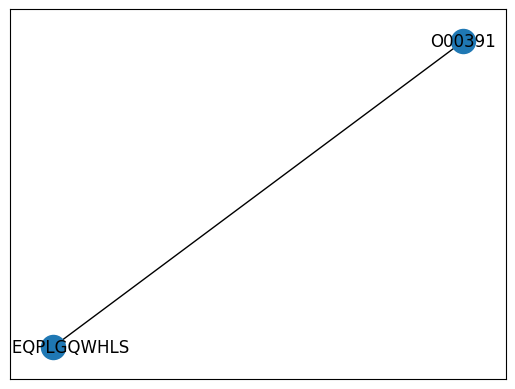

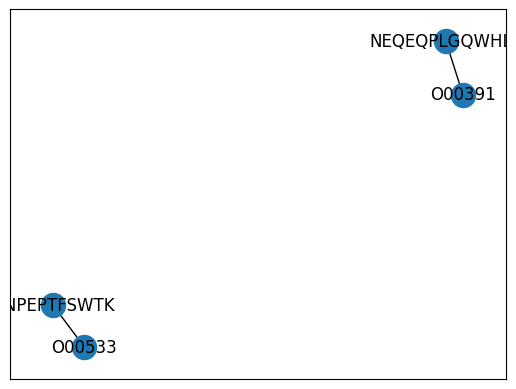

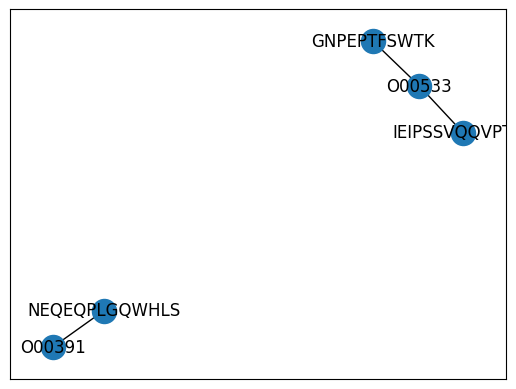

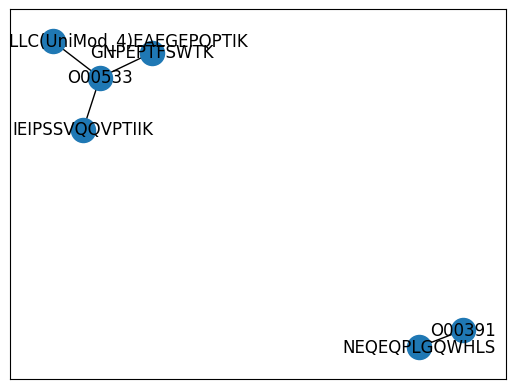

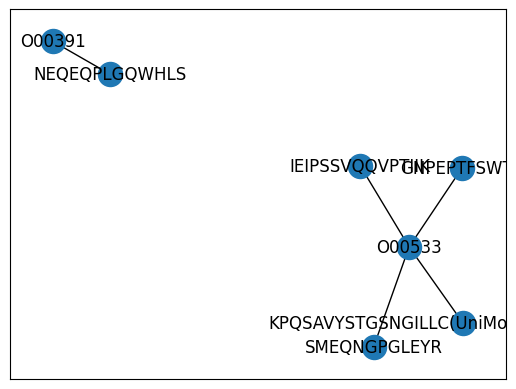

In [3]:
# First networkx library is imported 
# along with matplotlib
import networkx as nx
import matplotlib.pyplot as plt
   
  
# Defining a Class
class GraphVisualization:
   
    def __init__(self):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
        self.visual = []
          
    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
          
    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()
  
# Driver code
G = GraphVisualization()

display_graph =  input("Hello! Do you want to see a sample of how the graph has been constructed? (yes/no)")
if display_graph.lower() == 'yes':
    num_nodes =  input("Great! How many nodes you want to see? Please provide a number between 1 and 20")
    num_nodes = int(num_nodes)
    print(type(num_nodes))
    peptide_nodes = set(data['Peptide'].head(num_nodes))
    protein_nodes = set(data['UniProt'].head(num_nodes))
    # # Add the peptide nodes to the graph
    # G.add_nodes_from(peptide_nodes, bipartite=0)

    # # Add the protein nodes to the graph
    # G.add_nodes_from(protein_nodes, bipartite=1)

    # Iterate through the interactions and add edges to the graph
    for index, row in data.head(num_nodes).iterrows():
        peptide = row['Peptide']
        protein = row['UniProt']
        interaction_score = row['PeptideAbundance']
        G.addEdge(peptide, protein)
        G.addEdge(peptide, protein)
        G.visualize()

In [4]:
# Create two sets of nodes for peptides and proteins
peptide_nodes = set(data['Peptide'])
protein_nodes = set(data['UniProt'])

# Create a bipartite graph
G = nx.Graph()

# Add the peptide nodes to the graph
G.add_nodes_from(peptide_nodes, bipartite=0)

# Add the protein nodes to the graph
G.add_nodes_from(protein_nodes, bipartite=1)

# Iterate through the interactions and add edges to the graph
for index, row in data.head(10).iterrows():
    peptide = row['Peptide']
    protein = row['UniProt']
    interaction_score = row['PeptideAbundance']
    G.add_edge(peptide, protein, weight=interaction_score)
    G.add_edge(peptide, protein)

# Save the graph as a GraphML file
nx.write_graphml(G, 'AMP_Parkinsons_Protein_Peptide.graphml')

with open('graphJson.json', 'w') as outfile1:
    outfile1.write(json.dumps(json_graph.node_link_data(G)))


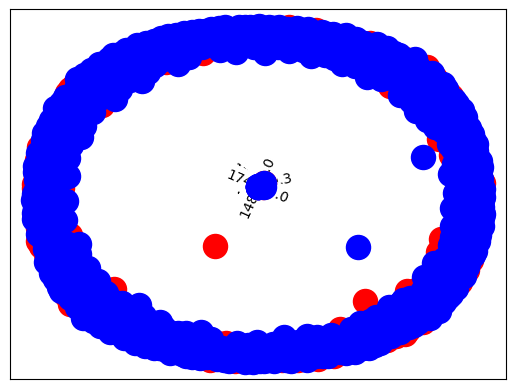

In [5]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=protein_nodes, node_color='r')
nx.draw_networkx_nodes(G, pos, nodelist=peptide_nodes, node_color='b')
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v):d['weight'] for u,v,d in G.edges(data=True)})
plt.show()